### 6. Feladatsor

Konzisztencia rend, stabilitás 1.

#### Dahlquist-féle tesztegyenlet

$$
\begin{align}
     \dot x = \lambda x
\end{align}
$$

ahol $\lambda \in \mathbb{C}$ paraméter. 


Megoldása: 

$$x(t) = c\cdot e^{\lambda t} = c\cdot e^{(a+bi)t} = c\cdot e^{a t} e^{ibt}.$$

Ennek hossza
$$ |x(t)| = |c| \cdot e^{at},$$

mely függvény monotonicitását $a$ előjele dönti el.

#### 1. Feladat

Tekintsük a feladatot a $[0,1]$ intervallumon $\lambda = 1$ paraméter, $x(0) = 1$ kezdetiérték mellett.

a) Oldjuk meg az EE módszer segítségével, 
$$h = 10^{-k} \quad (k=2, \ldots, 5)$$ 
lépéshosszokkal.

In [1]:
function [ts, ys] = explicit_euler(f, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;
    
    for k=1:(numel(ts) - 1)
        h = ts(k+1) - ts(k);
        ys(:, k+1) = ys(:, k) + h * f(ts(k), ys(:, k));
    end
end

In [2]:
h = 10^(-1);
[ts, ys] = explicit_euler(@(t, x)(x), 0:h:1, 1);

b) Megoldásainkat hasonlítsuk össsze a pontos megoldással, a végeredmény legyen a hibavektorok (valamilyen normában mért) hossza.

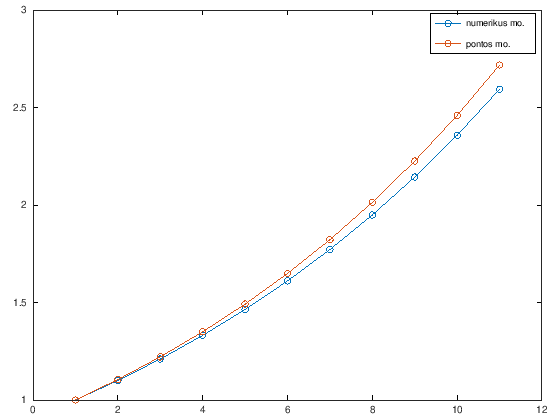

In [3]:
plot(ys, 'o-'); hold on
plot(exp(ts), '-o')

legend('numerikus mo.', 'pontos mo.')

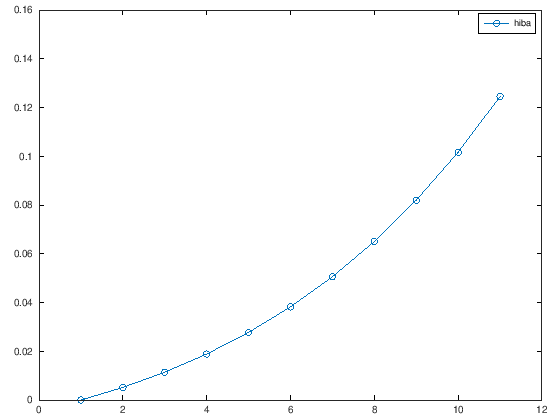

In [4]:
err = abs(ys - exp(ts));

plot(err, 'o-')
legend('hiba')

In [5]:
h = 10^(-1);
[ts, ys] = explicit_euler(@(t, x)(x), 0:h:1, 1);

err = abs(ys - exp(ts));
max(abs(err))

ans =  0.12454


In [6]:
h = 10^(-2);
[ts, ys] = explicit_euler(@(t, x)(x), 0:h:1, 1);

err = abs(ys - exp(ts));
max(abs(err))

ans =  0.013468


In [7]:
function errs = measure_errors(hs)
    errs = zeros(1, numel(hs));
    
    for k=1:numel(hs)
        h = hs(k);
        [ts, ys] = explicit_euler(@(t, x)(x), 0:h:1, 1);

        err = abs(ys - exp(ts));
        errs(k) = max(abs(err));
    end
end

In [8]:
hs = .1.^(2:5)
errs = measure_errors(hs)

hs =

   0.010000000   0.001000000   0.000100000   0.000010000

errs =

   0.013467999   0.001357896   0.000135902   0.000013591



c) Az így kapott hibákat ábrázoljuk egy log-log ábrán.

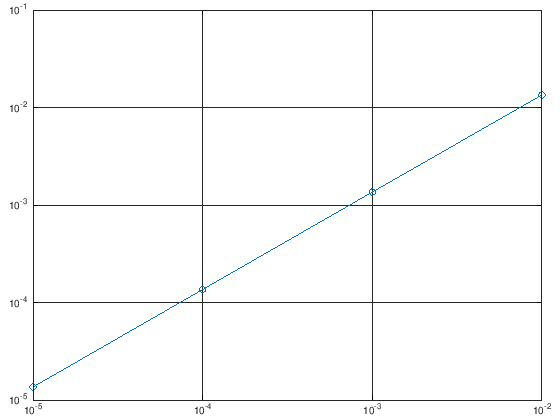

In [9]:
loglog(hs, errs, 'o-')
xlim([min(hs) max(hs)+eps])
grid on

d) Hogy tudnánk a kapott adatokra egyenest illeszteni? Ránézésre mi lenne ennek a meredeksége?

In [10]:
xs = 1:10;

polyfit(1:10, xs.^2 + 2*xs + 3, 2)

ans =

   1.0000   2.0000   3.0000



In [11]:
poly_coeffs = polyfit(log(hs), log(errs), 1)
exp(polyval(poly_coeffs, log(hs)))

poly_coeffs =

   0.99878   0.29446

ans =

   0.013499857   0.001353793   0.000135761   0.000013614



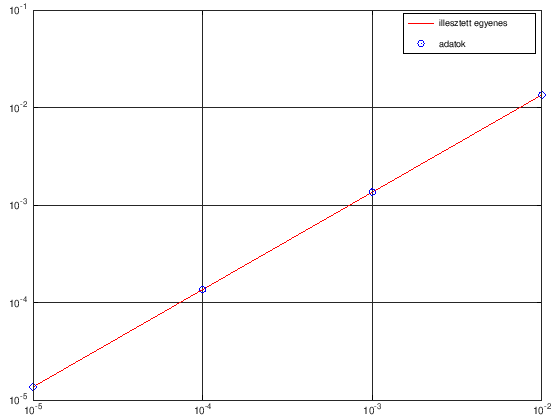

In [12]:
loglog(hs, exp(polyval(poly_coeffs, log(hs))), 'r-'); hold on;
loglog(hs, errs, 'bo');
legend("illesztett egyenes", "adatok")
xlim([min(hs) max(hs)+eps])
grid on

Mi történik amikor az EE módszert alkalmazzuk a tesztegyenletre?

$$
    y_{n+1} = y_n + h f(t_n, y_n) = y_n + h\lambda y_n = (1 + z)y_n = R(z)y_n,
$$

ahol $\mathbb{C} \ni z = h\lambda$ komplex szám egyszerre modellezi a feladatot és a lépéshosszt, az $R$ stabilitási-függvény pedig a numerikus módszert.

**Megjegyzés:**

1. Explicit módszer stabilitási-függvénye mindig polinom.
2. A (lineáris) rendfeltételeket teljesítő módszerekre
$$
R(z) \approx e^z,
$$
ahol a közelítés rendje megegyezik a módszer rendjével.
3. Az explicit módszerek stabilitási-függvényeinek első néhány tagja $e^z$ hatványsorának első néhány tagjával fog megegyezni. Például:
$$
    1 + z + \frac{1}{2} z^2 \approx e^z.
$$

Tudjuk, hogy ha $\operatorname{Re}(\lambda) \leq 0$, akkor a pontos megoldás hossza időben monoton csökkenő. 

Igaz-e ez a numerikus megoldásra? Igen, pontosan akkor, ha
$$
 | y_{n+1} | = |R(z)| |y_n| \leq |y_n|,
$$

így világos, hogy a megfelelő feltételt az
$$
 S = \left\{z\in\mathbb{C}\colon |R(z)| \leq 1\right\}
$$
stabilitási-tartomány elemei teljesítik.

A gyakorlatban $S$ segítségével egy adott módszerhez $(R)$ és feladathoz $(\lambda)$ választhatunk megfelelő lépéshosszt ($h$).

#### 2. Feladat

Ábrázoljunk stabilitási tartományokat `contourf` segítségével!

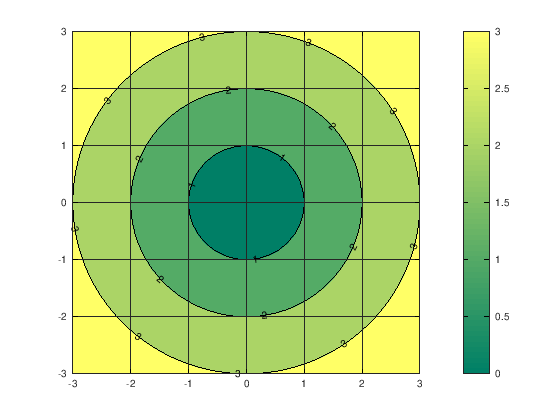

In [13]:
[X, Y] = meshgrid(linspace(-3, 3, 40), linspace(-3, 3, 40));
Z = X + 1i*Y;

contourf(X, Y, abs(Z), [0 1 2 3], 'ShowText','on')
colorbar
grid on
colormap summer

a) Az EE módszer stabilitási függvénye $1+z$. Ábrázoljuk a stabilitási tartományát.

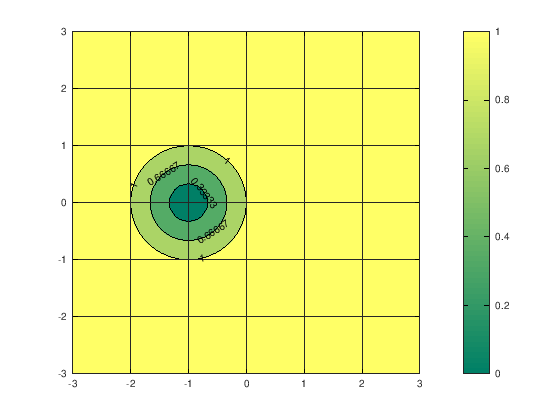

In [14]:
% EE
contourf(X, Y, abs(1 + Z), linspace(0, 1, 4), 'ShowText','on')
colorbar
grid on
colormap summer

b) A MPM stabilitási függvénye $1+z + \frac{1}{2} z^2$. Ábrázoljuk a stabilitási tartományát.

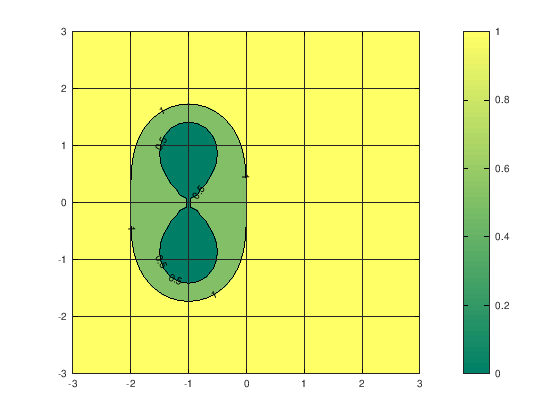

In [15]:
% MPM
contourf(X, Y, abs(1 + Z + .5*Z.^2), [0, .5, 1], 'ShowText','on')
colorbar
grid on
colormap summer

c) Az IE módszer stabilitási függvénye $\frac{1}{1-z}$. Ábrázoljuk a stabilitási tartományát.

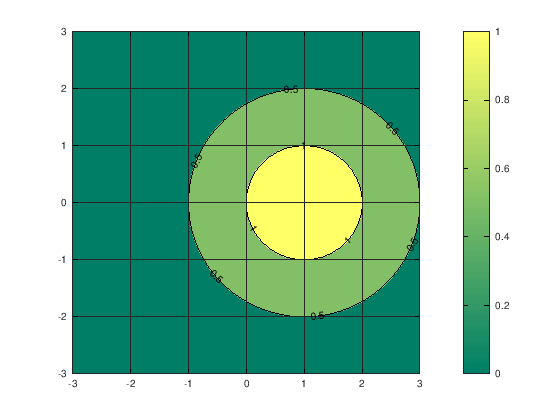

In [16]:
% IE
contourf(X, Y, 1./abs(1-Z), [0, .5, 1], 'ShowText','on')
colorbar
colormap summer
grid on

#### 3.* Feladat

Írjunk függvényt, ami Butcher-tablója $(A,b)$ alapján ábrázolja a Runge-Kutta módszer stabilitási-tartományát.
Felhasználhatjuk a

$$
R(z) = 1 + zb^T (I - zA)^{-1} e
$$

képletet, ahol $b$ oszlopvektor, $I$ egységmátrix, $e = [1, \ldots, 1]^T$.

In [17]:
function visualize_stability_area(A, b, xlims, ylims, ticks)
    tic;
    
    [X, Y] = meshgrid(linspace(xlims(1), xlims(2), ticks),
                      linspace(ylims(1), ylims(2), ticks));
    Z = X + 1i*Y;

    vecZ = Z(:);
    
    I  = eye(rows(A)*numel(vecZ));
    e  = ones(rows(A)*numel(vecZ), 1);
    bT = kron(eye(numel(vecZ)), b);
        
    Rz = 1 + vecZ .*  bT * ((I - kron(diag(vecZ), A))  \ e);

    contourf(X, Y, abs(reshape(Rz, size(Z))), [0, .25, .5, .75 1], 'ShowText','on')
    colorbar
    grid on
    colormap summer
    toc;
end

Elapsed time is 0.427513 seconds.


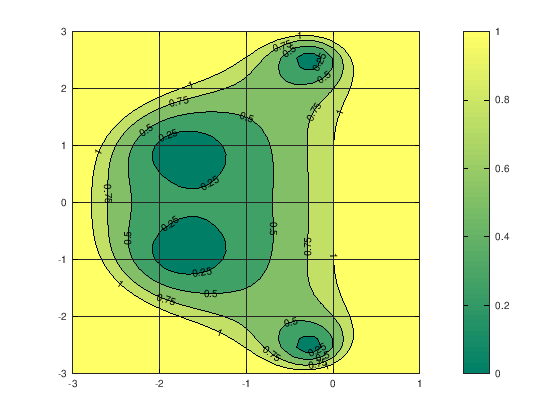

In [18]:
% RK4

A = [ 0, 0, 0, 0 
     .5, 0, 0, 0
      0,.5, 0, 0
      0, 0, 1, 0];
b = [ 1, 2, 2, 1]/6;

visualize_stability_area(sparse(A), b, [-3 1], [-3 3], 40)